# <center> Data Science Project </center>#

### Names : Salma Damak
### Names :  Haytham AIT ETTAJER
### Names : Panongbene Jean Mohamed Sawadogo 
### Github : https://github.com/Panongbene/PROJECT_DATA_SCIENCE/tree/master/Data-Science-Project

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Loads File

In [ ]:
# Load Data
#links = pd.read_csv('data/links.csv')
#movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')
#tags = pd.read_csv('data/tags.csv')

# Utilities Functions



In [ ]:
def RMSE(real_value, prediction):
    """This function compute the RMSE between two element element"""

    return np.sqrt(np.sum((real_value-prediction)**2)/len(real_value))

In [ ]:
def accuracy(observed, fitted):
    """Compute accurary, given observed and fitted values"""
    return np.equal(observed, fitted).sum()/len(observed)

def precision(observed, fitted):
    """Compute precision, given observed and fitted values"""
    if ((len(observed) == 0) or (np.sum(fitted == 1) == 0)):
        return 0.0

    return np.sum((observed == 1) & (fitted == 1))/np.sum(fitted == 1)

def recall(observed, fitted):
    """Compute recall, given observed and fitted values"""
    return np.sum((observed == 1) & (fitted == 1))/np.sum(observed == 1)

def F1_score(observed, fitted):
    """Compute F1-score, given observed and fitted values"""
    if ((len(observed) == 0) or ((precision(observed, fitted) + recall(observed, fitted)) == 0)):
        return 0.0
    return 2 * precision(observed, fitted) * recall(observed, fitted) / (precision(observed, fitted) + recall(observed, fitted))

In [ ]:
def prediction(UserItem, dictionnaryRating, threshold):
    """This function take the dictionnaire of rating and the threshold and 
    compute the prediction"""

    accuracy1 = 0.0
    precision1 = 0.0
    recall1 = 0.0
    f1Score1 = 0.0

    predictionValue = list()

    realValue = list()

    predictionDictionnaire = dict()

    for i in dictionnaryRating:
      tampValue = dictionnaryRating[i]
      if(tampValue >= threshold):
          predictionDictionnaire[i] = 1
          predictionValue.append(1)
      else:
          predictionDictionnaire[i] = 0
          predictionValue.append(0)
      if(i in UserItem['movieId'].values):
          realValue.append(1)
      else:
          realValue.append(0)

      
    realValue = np.array(realValue)
    predictionValue = np.array(predictionValue)

    accuracy1 = accuracy(realValue, predictionValue)
    precision1 = precision(realValue, predictionValue)
    recall1 = recall(realValue, predictionValue)
    f1Score1 = F1_score(realValue, predictionValue)


    return predictionDictionnaire, accuracy1, precision1, recall1, f1Score1

In [ ]:
def split_Data_Training_Testing(ratings, percentageTesting):
    """This function take the rating dataframe and the percentage of spliting, it splits the datafram in training dataframe 
    and dictionnaire dataframe for testing"""

    numberOfUser = list(set(ratings['userId'].values))
    indexTesting = np.random.randint(1, len(numberOfUser), int(len(numberOfUser)*percentageTesting/100))
    indexTraining = np.array([i for i in numberOfUser if(i not in indexTesting)])

    Data_Testing = dict()
    Data_Testing[0] = ratings[ratings['userId']==indexTesting[0]]
    for i in range(1,len(indexTesting)):
        #Data_Testing[i] = pd.concat([Data_Testing[i-1], ratings[ratings['userId']==i]])
        Data_Testing[i] = ratings[ratings['userId']==indexTesting[i]]

    
    Data_Training = ratings[ratings['userId']==indexTraining[0]]
    for i in range(1,len(indexTesting)):
        Data_Training = pd.concat([Data_Training, ratings[ratings['userId']==i]])

    return Data_Testing, Data_Training

In [ ]:
def extract_Same_item(ratings, idElement1, idElement2):
    """This function return the lists of ratings items where we have a rating in 
    this items for each elements"""


    element1 = ratings[ratings['userId']==idElement1]
    element2 = ratings[ratings['userId']==idElement2]

    ratingsElement1 = list()
    ratingsElement2 = list()
    idMovies = list()

    for i in range(element1.shape[0]):
        if (int(element1.iloc[i]['movieId']) in element2['movieId'].values):
            tamp = element2[element2['movieId']==int(element1.iloc[i]['movieId'])]
    
            idMovies.append(int(element1.iloc[i]['movieId']))
            ratingsElement1.append(element1.iloc[i]['rating'])
            ratingsElement2.append(tamp['rating'].values[0])
      
    return idMovies, ratingsElement1, ratingsElement2

In [ ]:
def build_matrix_similarity_bravais_pearson(ratings_traing, ratings_testing, similarity_bravais_pearson):
    """this function build the similarity matrix of bravais pearson"""

    userIdTraining = list(set(ratings_traing['userId'].values))
    userIdTesting = list(set(ratings_testing['userId'].values))
    ratings = pd.concat([ratings_traing, ratings_testing])
    matrixSimilarity = dict()

    for i in userIdTraining:
        ligneMatrixSimilarity = dict()
        for j in userIdTesting:
            idMovies, ratingsElement1, ratingsElement2 = extract_Same_item(ratings, i, j)
            ligneMatrixSimilarity[j] = similarity_bravais_pearson(np.array(ratingsElement1), np.array(ratingsElement2))
        matrixSimilarity[i] = ligneMatrixSimilarity

    return matrixSimilarity

In [ ]:
def build_matrix_similarity_cosinus(ratings_traing, ratings_testing, similarity_cosinus):
    """this function build the similarity matrix of cosinus"""
    
    userIdTraining = list(set(ratings_traing['userId'].values))
    userIdTesting = list(set(ratings_testing['userId'].values))
    ratings = pd.concat([ratings_traing, ratings_testing])
    matrixSimilarity = dict()

    for i in userIdTraining:
        ligneMatrixSimilarity = dict()
        noteEl1only = ratings[ratings['userId']==i]['rating'].values
        for j in userIdTesting:
            idMovies, ratingsElement1, ratingsElement2 = extract_Same_item(ratings, i, j)
            noteEl2only = ratings[ratings['userId']==j]['rating'].values
            ligneMatrixSimilarity[j] = similarity_cosinus(np.array(ratingsElement1), np.array(ratingsElement2), np.array(noteEl1only), np.array(noteEl2only))
        matrixSimilarity[i] = ligneMatrixSimilarity

    return matrixSimilarity

In [ ]:
def build_mean_value_users(dataFrameNoteItem):
    """This function build the mean value item for each user"""

    userId = list(set(dataFrameNoteItem['userId'].values))
    meanValuesUser = dict()

    for i in userId:
        meanValuesUser[i] = np.mean(dataFrameNoteItem[dataFrameNoteItem['userId']==i]['rating'].values)

    return meanValuesUser

In [ ]:
def delete_movie(dataframeUser, numberMovieTodelete):
    """
    Thsi function takes the ratings datafram of user and the number of movie you want to delete
    It will return the news user rating dataframe movies
    """

    movieId = list(dataframeUser['movieId'].values)
    movieDelete = dict()

    if (numberMovieTodelete>= len(movieId)):
        print("Error : number Movie To delete >= all movies noted in this users" )
        return dataframeUser, movieDelete
    
    idMovieToDelete = random.sample(movieId, numberMovieTodelete)
    idnewMovie = np.array([i for i in movieId if(i not in idMovieToDelete)])

    newDataFram = dataframeUser[dataframeUser['movieId'] == idnewMovie[0]]
    
    for i in range(1, len(idnewMovie)):
        newDataFram = pd.concat([newDataFram, dataframeUser[dataframeUser['movieId']==idnewMovie[i]]])

    for i in idMovieToDelete:
        movieDelete[i] = dataframeUser[dataframeUser['movieId']==i]['rating'].values[0]

    return newDataFram, movieDelete

In [ ]:
def extract_user_id(dataframe, idUser):
    """This function  take a rating dataframe and a list of user, it return a new rating dataframe contain only the user in list of user"""
    
    newDataFram = dataframe[dataframe['userId'] == idUser[0]]
    
    for i in range(1, len(idUser)):
        newDataFram = pd.concat([newDataFram, dataframe[dataframe['userId']==idUser[i]]])

    return newDataFram

# Compute The Similarity Between Users

In [ ]:
def similarity_bravais_pearson(noteEl1, noteEl2):
    """This function compute the bravais pearson conficient similarity between two user given by parameters"""

    if(len(noteEl1) == 0):
      return 0.0

    tamp1 = np.sum((noteEl1-np.mean(noteEl1))*(noteEl2-np.mean(noteEl2)))
    tamp2 = np.sqrt(np.sum((noteEl1-np.mean(noteEl1))**2)*np.sum((noteEl2-np.mean(noteEl2))**2))
    if (tamp2 == 0.0):
      if (np.mean(noteEl1 == noteEl2) == 1):
          return 1.0
      else:
          return 0.0

    return tamp1/tamp2

In [ ]:
def similarity_cosinus(noteEl1, noteEl2, noteEl1only, noteEl2only):
    """This function compute the cosinus similarity between to user"""

    return np.sum(noteEl1*noteEl2)/np.sqrt((np.sum(noteEl1only**2))*(np.sum(noteEl2only**2)))

# Compute The Recommandation

In [ ]:
def recommandation_similarity_ponderation(valuesItems, similarity_vector):
    """This function compute the value of recommandation on an item """
  
    return np.sum(valuesItems*similarity_vector)/np.sum(np.abs(similarity_vector))

In [ ]:
def recommandation_similarity_mean(valuesItems, similarity_vector, K):
    """This function compute the values of recommandation using the mean of the first K max similarity"""

    tampon_datafram = pd.DataFrame(zip(valuesItems,similarity_vector))
    first_k_valuesItems = tampon_datafram.sort_values(by=[1], ascending=False).reset_index()[0].values[0:K]

    return np.mean(first_k_valuesItems)

In [ ]:
def recommandation_similarity_mean_another(elmentMeanValuesItems, valuesItems, meanValuesItems, similarity_vector):
    """This fonction compute the recommandation using the similarity and the mean note of other item"""

    return elmentMeanValuesItems+(np.sum(similarity_vector*(valuesItems-meanValuesItems))/np.sum(np.abs(similarity_vector)))

# Recommandation Function Preprocessing

In [ ]:
def recommandation_user_cosinus(User, idMovie, trainingData, K_similarity_mean):
    """
    This function compute the value of recommandation of user for the idMovie using the cosinus
    similarity
    """
    
    
    recommandationSimilarityPonderation = dict()
    recommandationSimilarityMean = dict()
    recommandationSimilarityMeanAnother = dict()
    

    valuesItems = dict()
    similarity_vector = dict()
    
    userId = list(set(trainingData['userId'].values))
    idUser = User['userId'].iloc[0]
    
    matrixSimilarity = build_matrix_similarity_cosinus(User, trainingData, similarity_cosinus)
    dataFrameNoteItem = pd.concat([User, trainingData])
    meanValuesItems = build_mean_value_users(dataFrameNoteItem)
    meanValues = dict()

    for i in userId:
        tamp1 = trainingData[trainingData['userId']==i]
        
        #print(tamp1['movieId'].values)
        for j in idMovie:
          valuesItems[j] = list()
          similarity_vector[j] = list()
          meanValues[j] = list()
          if(j in tamp1['movieId'].values):
            valuesItems[j].append(tamp1[tamp1['movieId']==j]['rating'].values[0])
            meanValues[j].append(meanValuesItems[i])
            similarity_vector[j].append(matrixSimilarity[idUser][i])
    
    for j in valuesItems:
      valuesItems[j] = np.array(valuesItems[j])
      similarity_vector[j] = np.array(similarity_vector[j])
    
    if(len(similarity_vector)==0):
        return 0.0

    for j in idMovie:
      if(len(similarity_vector[j]) == 0):
        recommandationSimilarityPonderation[j] = 0.0
        recommandationSimilarityMean[j] = 0.0
        recommandationSimilarityMeanAnother[j] = 0.0
      else:
        recommandationSimilarityPonderation[j] = recommandation_similarity_ponderation(valuesItems[j], similarity_vector[j])
        recommandationSimilarityMean[j] = recommandation_similarity_mean(valuesItems[j], similarity_vector[j], K_similarity_mean)
        recommandationSimilarityMeanAnother[j] = recommandation_similarity_mean_another(meanValuesItems[idUser], valuesItems[j], meanValues[j], similarity_vector[j])

    return recommandationSimilarityPonderation, recommandationSimilarityMean , recommandationSimilarityMeanAnother

In [ ]:
def recommandation_user_bravais_pearson(User, idMovie, trainingData, K_similarity_mean):
    """
    This function compute the value of recommandation of user for the idMovie using the bravais pearson
    similarity
    """
    
    recommandationSimilarityPonderation = dict()
    recommandationSimilarityMean = dict()
    recommandationSimilarityMeanAnother = dict()
    

    valuesItems = dict()
    similarity_vector = dict()
    
    userId = list(set(trainingData['userId'].values))
    idUser = User['userId'].iloc[0]
    
    matrixSimilarity = build_matrix_similarity_bravais_pearson(User, trainingData, similarity_bravais_pearson)

    dataFrameNoteItem = pd.concat([User, trainingData])
    meanValuesItems = build_mean_value_users(dataFrameNoteItem)
    meanValues = dict()

    for i in userId:
        tamp1 = trainingData[trainingData['userId']==i]
        
        for j in idMovie:
          valuesItems[j] = list()
          similarity_vector[j] = list()
          meanValues[j] = list()
          if(j in tamp1['movieId'].values):
            valuesItems[j].append(tamp1[tamp1['movieId']==j]['rating'].values[0])
            meanValues[j].append(meanValuesItems[i])
            similarity_vector[j].append(matrixSimilarity[idUser][i])
    
    for j in valuesItems:
      valuesItems[j] = np.array(valuesItems[j])
      similarity_vector[j] = np.array(similarity_vector[j])
    
    if(len(similarity_vector)==0):
        return 0.0

    for j in idMovie:
      if(len(similarity_vector[j]) == 0):
        recommandationSimilarityPonderation[j] = 0.0
        recommandationSimilarityMean[j] = 0.0
        recommandationSimilarityMeanAnother[j] = 0.0
      else:
        recommandationSimilarityPonderation[j] = recommandation_similarity_ponderation(valuesItems[j], similarity_vector[j])
        recommandationSimilarityMean[j] = recommandation_similarity_mean(valuesItems[j], similarity_vector[j], K_similarity_mean)
        recommandationSimilarityMeanAnother[j] = recommandation_similarity_mean_another(meanValuesItems[idUser], valuesItems[j], meanValues[j], similarity_vector[j])

    return recommandationSimilarityPonderation, recommandationSimilarityMean , recommandationSimilarityMeanAnother

In [ ]:
def recommandation_naive_mean(idMovie, trainingData):
    """This function compute the naive recommandation for a user based just of the mean value of training user"""

    recommandationValue = dict()

    for i in idMovie:
      recommandationValue[i] = np.min(ratings[ratings['movieId'] == i]['rating'].values)#np.mean(ratings[ratings['movieId'] == i]['rating'].values)

    return recommandationValue

# Testing ours algorithm

#### Split Data

In [ ]:
Data_Testing_Tamp, Data_Training = split_Data_Training_Testing(ratings, 30)

Data_Testing = dict()
k = 0
for i in  Data_Testing_Tamp:
    if (len(Data_Testing_Tamp[i])>100 and len(Data_Testing_Tamp[i])<=200):
        newDataFram, movieDelete = delete_movie(Data_Testing_Tamp[i], len(Data_Testing_Tamp[i])-100)
        Data_Testing[k] = dict()
        Data_Testing[k][0] = newDataFram
        Data_Testing[k][1] = movieDelete
        Data_Testing[k][2] = Data_Testing_Tamp[i]
        k=k+1

#### Thresholds

In [ ]:
thresholdsRating = np.arange(1,5.2,0.4)

# default Values
numberOfMovieRatingT = 80
numberMovieTesting = 20
recommandationMeanThresholds = 30

In [ ]:
# cosinus result
rsmeValuesCosinus = dict()
rsmeValuesCosinus['SimilarityPonderation'] = list()
rsmeValuesCosinus['SimilarityMean'] = list()
rsmeValuesCosinus['SimilarityMeanAnother'] = list()

accuracyValuesCosinus = dict()
accuracyValuesCosinus['SimilarityPonderation'] = list()
accuracyValuesCosinus['SimilarityMean'] = list()
accuracyValuesCosinus['SimilarityMeanAnother'] = list()

precisionValuesCosinus = dict()
precisionValuesCosinus['SimilarityPonderation'] = list()
precisionValuesCosinus['SimilarityMean'] = list()
precisionValuesCosinus['SimilarityMeanAnother'] = list()

recallValuesCosinus = dict()
recallValuesCosinus['SimilarityPonderation'] = list()
recallValuesCosinus['SimilarityMean'] = list()
recallValuesCosinus['SimilarityMeanAnother'] = list()

f1ScoreValuesCosinus = dict()
f1ScoreValuesCosinus['SimilarityPonderation'] = list()
f1ScoreValuesCosinus['SimilarityMean'] = list()
f1ScoreValuesCosinus['SimilarityMeanAnother'] = list()

# Bravais Pearson Result

rsmeValuesBavaisPearson = dict()
rsmeValuesBavaisPearson['SimilarityPonderation'] = list()
rsmeValuesBavaisPearson['SimilarityMean'] = list()
rsmeValuesBavaisPearson['SimilarityMeanAnother'] = list()

accuracyValuesBavaisPearson = dict()
accuracyValuesBavaisPearson['SimilarityPonderation'] = list()
accuracyValuesBavaisPearson['SimilarityMean'] = list()
accuracyValuesBavaisPearson['SimilarityMeanAnother'] = list()

precisionValuesBavaisPearson = dict()
precisionValuesBavaisPearson['SimilarityPonderation'] = list()
precisionValuesBavaisPearson['SimilarityMean'] = list()
precisionValuesBavaisPearson['SimilarityMeanAnother'] = list()

recallValuesBavaisPearson = dict()
recallValuesBavaisPearson['SimilarityPonderation'] = list()
recallValuesBavaisPearson['SimilarityMean'] = list()
recallValuesBavaisPearson['SimilarityMeanAnother'] = list()

f1ScoreValuesBavaisPearson = dict()
f1ScoreValuesBavaisPearson['SimilarityPonderation'] = list()
f1ScoreValuesBavaisPearson['SimilarityMean'] = list()
f1ScoreValuesBavaisPearson['SimilarityMeanAnother'] = list()

# Naive Methode
rsmeNaive = list()
accuracyValuesNaive = list()
precisionValuesNaive = list()
recallValuesNaive = list()
f1ScoreValuesNaive = list()


In [ ]:
for i in thresholdsRating:

    rmseTamponSPList = list()
    rmseTamponMList = list()
    rmseTamponMAList = list()

    accuracySPList = list()
    accuracyMList = list()
    accuracyMAList = list()

    precisionSPList = list()
    precisionMList = list()
    precisionMAList = list()

    recallSPList = list()
    recallMList = list()
    recallMAList = list()

    f1ScoreSPList = list()
    f1ScoreMList = list()
    f1ScoreMAList = list()

    # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
    rmseTamponBpSPList = list()
    rmseTamponBpMList = list()
    rmseTamponBpMAList = list()

    accuracyBpSPList = list()
    accuracyBpMList = list()
    accuracyBpMAList = list()

    precisionBpSPList = list()
    precisionBpMList = list()
    precisionBpMAList = list()

    recallBpSPList = list()
    recallBpMList = list()
    recallBpMAList = list()

    f1ScoreBpSPList = list()
    f1ScoreBpMList = list()
    f1ScoreBpMAList = list()


    # Naive Methode Result-------------------------------------------------------------------------------------------------------------------------------
    rmseTamponBpNaiveList = list()
    accuracyBpNaiveList = list()
    precisionBpNaiveList = list()
    recallBpNaiveList = list()
    f1ScoreBpNaiveList = list()

    for j in range(len(Data_Testing)):
        recommandationMeanThresholds = 50
        
        
        # Cosinus Result-------------------------------------------------------------------------------------------------------------------------------
        recommandationSimilarityPonderation, recommandationSimilarityMean, recommandationSimilarityMeanAnother = recommandation_user_cosinus(Data_Testing[j][0], list(Data_Testing[j][1].keys()), Data_Training, recommandationMeanThresholds)
        
        predictionDictionnaireSP, accuracySP, precisionSP, recallSP, f1ScoreSP = prediction(Data_Testing[j][2], recommandationSimilarityPonderation, i)
        rmseTamponSP = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireSP.values())))
        accuracySPList.append(accuracySP)
        precisionSPList.append(precisionSP)
        recallSPList.append(recallSP)
        f1ScoreSPList.append(f1ScoreSP)
        rmseTamponSPList.append(rmseTamponSP)

        predictionDictionnaireM, accuracyM, precisionM, recallM, f1ScoreM = prediction(Data_Testing[j][2], recommandationSimilarityMean, i)
        rmseTamponM = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireM.values())))
        rmseTamponMList.append(rmseTamponM)
        accuracyMList.append(accuracyM)
        precisionMList.append(precisionM)
        recallMList.append(recallM)
        f1ScoreMList.append(f1ScoreM)

        predictionDictionnaireMA, accuracyMA, precisionMA, recallMA, f1ScoreMA = prediction(Data_Testing[j][2], recommandationSimilarityMeanAnother, i)
        rmseTamponMA = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireMA.values())))
        rmseTamponMAList.append(rmseTamponMA)
        accuracyMAList.append(accuracyMA)
        precisionMAList.append(precisionMA)
        recallMAList.append(recallMA)
        f1ScoreMAList.append(f1ScoreMA)

        # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
        recommandationSimilarityPonderationBP, recommandationSimilarityMeanBP, recommandationSimilarityMeanAnotherBP = recommandation_user_bravais_pearson(Data_Testing[j][0], list(Data_Testing[j][1].keys()), Data_Training, recommandationMeanThresholds)

        predictionDictionnaireBpSP, accuracyBpSP, precisionBpSP, recallBpSP, f1ScoreBpSP = prediction(Data_Testing[j][2], recommandationSimilarityPonderationBP, i)
        rmseTamponBpSP = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpSP.values())))
        rmseTamponBpSPList.append(rmseTamponBpSP)
        accuracyBpSPList.append(accuracyBpSP)
        precisionBpSPList.append(precisionBpSP)
        recallBpSPList.append(recallBpSP)
        f1ScoreBpSPList.append(f1ScoreBpSP)

        predictionDictionnaireBpM, accuracyBpM, precisionBpM, recallBpM, f1ScoreBpM = prediction(Data_Testing[j][2], recommandationSimilarityMeanBP, i)
        rmseTamponBpM = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpM.values())))
        rmseTamponBpMList.append(rmseTamponBpM)
        accuracyBpMList.append(accuracyBpM)
        precisionBpMList.append(precisionBpM)
        recallBpMList.append(recallBpM)
        f1ScoreBpMList.append(f1ScoreBpM)

        predictionDictionnaireBpMA, accuracyBpMA, precisionBpMA, recallBpMA, f1ScoreBpMA = prediction(Data_Testing[j][2], recommandationSimilarityMeanAnotherBP, i)
        rmseTamponBpMA = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpMA.values())))
        accuracyBpMAList.append(accuracyBpMA)
        precisionBpMAList.append(precisionBpMA)
        recallBpMAList.append(recallBpMA)
        f1ScoreBpMAList.append(f1ScoreBpMA)
        rmseTamponBpMAList.append(rmseTamponBpMA)
        # Naive Methode Result-------------------------------------------------------------------------------------------------------------------------------
        naiveMethode = recommandation_naive_mean(list(Data_Testing[j][1].keys()), newDataFram)
        predictionDictionnaireBpNaive, accuracyBpNaive, precisionBpNaive, recallBpNaive, f1ScoreBpNaive = prediction(Data_Testing[j][2], naiveMethode, i)
        rmseTamponBpNaive = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpNaive.values())))
        precisionBpNaiveList.append(precisionBpNaive)
        recallBpNaiveList.append(recallBpNaive)
        f1ScoreBpNaiveList.append(f1ScoreBpNaive)
        accuracyBpNaiveList.append(accuracyBpNaive)
        rmseTamponBpNaiveList.append(rmseTamponBpNaive)

    # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
    rsmeValuesCosinus['SimilarityPonderation'].append(np.mean(rmseTamponSPList))
    rsmeValuesCosinus['SimilarityMean'].append(np.mean(rmseTamponMList))
    rsmeValuesCosinus['SimilarityMeanAnother'].append(np.mean(rmseTamponMAList))

    accuracyValuesCosinus['SimilarityPonderation'].append(np.mean(accuracySPList))
    accuracyValuesCosinus['SimilarityMean'].append(np.mean(accuracyMList))
    accuracyValuesCosinus['SimilarityMeanAnother'].append(np.mean(accuracyMAList))

    precisionValuesCosinus['SimilarityPonderation'].append(np.mean(precisionSPList))
    precisionValuesCosinus['SimilarityMean'].append(np.mean(precisionMList))
    precisionValuesCosinus['SimilarityMeanAnother'].append(np.mean(precisionMAList))

    recallValuesCosinus['SimilarityPonderation'].append(np.mean(recallSPList))
    recallValuesCosinus['SimilarityMean'].append(np.mean(recallMList))
    recallValuesCosinus['SimilarityMeanAnother'].append(np.mean(recallMAList))

    f1ScoreValuesCosinus['SimilarityPonderation'].append(np.mean(f1ScoreSPList))
    f1ScoreValuesCosinus['SimilarityMean'].append(np.mean(f1ScoreMList))
    f1ScoreValuesCosinus['SimilarityMeanAnother'].append(np.mean(f1ScoreMAList))

    # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
    rsmeValuesBavaisPearson['SimilarityPonderation'].append(np.mean(rmseTamponBpSPList))
    rsmeValuesBavaisPearson['SimilarityMean'].append(np.mean(rmseTamponBpMList))
    rsmeValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(rmseTamponBpMAList))

    accuracyValuesBavaisPearson['SimilarityPonderation'].append(np.mean(accuracyBpSPList))
    accuracyValuesBavaisPearson['SimilarityMean'].append(np.mean(accuracyBpMList))
    accuracyValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(accuracyBpMAList))

    precisionValuesBavaisPearson['SimilarityPonderation'].append(np.mean(precisionBpSPList))
    precisionValuesBavaisPearson['SimilarityMean'].append(np.mean(precisionBpMList))
    precisionValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(precisionBpMAList))

    recallValuesBavaisPearson['SimilarityPonderation'].append(np.mean(recallBpSPList))
    recallValuesBavaisPearson['SimilarityMean'].append(np.mean(recallBpMList))
    recallValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(recallBpMAList))

    f1ScoreValuesBavaisPearson['SimilarityPonderation'].append(np.mean(f1ScoreBpSPList))
    f1ScoreValuesBavaisPearson['SimilarityMean'].append(np.mean(f1ScoreBpMList))
    f1ScoreValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(f1ScoreBpMAList))

    # Naive Methode Result-------------------------------------------------------------------------------------------------------------------------------
    rsmeNaive.append(np.mean(rmseTamponBpNaiveList))
    accuracyValuesNaive.append(np.mean(accuracyBpNaiveList))
    precisionValuesNaive.append(np.mean(precisionBpNaiveList))
    recallValuesNaive.append(np.mean(recallBpNaiveList))
    f1ScoreValuesNaive.append(np.mean(f1ScoreBpNaiveList))

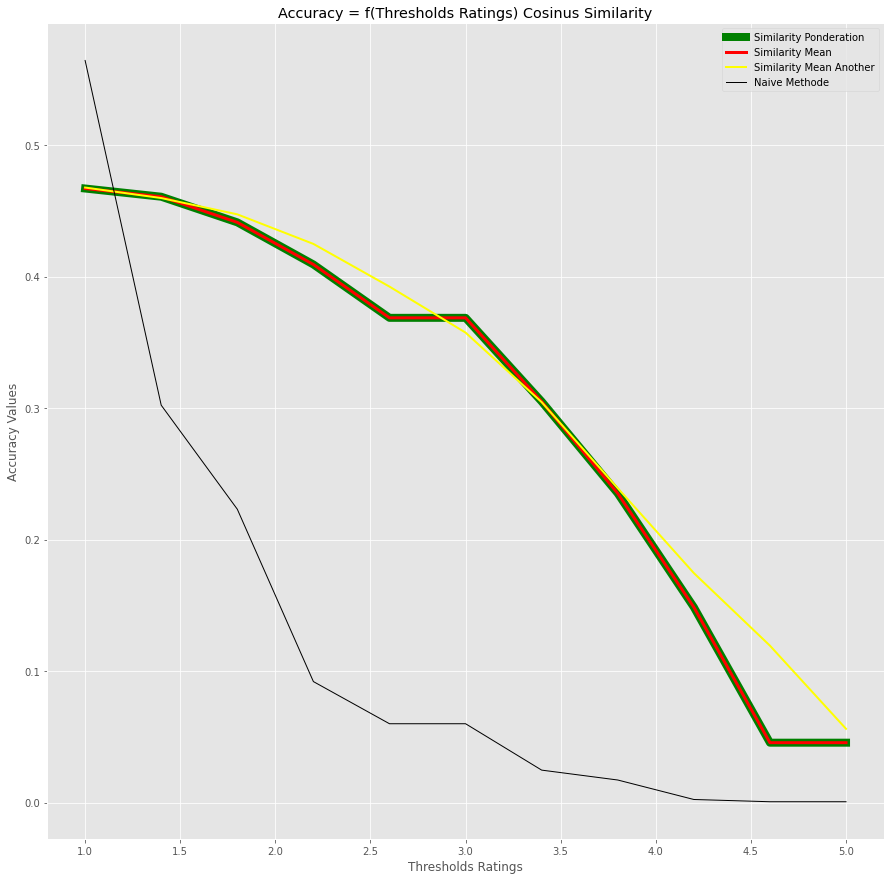

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Thresholds Ratings')
plt.ylabel('Accuracy Values')
plt.title('Accuracy = f(Thresholds Ratings) Cosinus Similarity')
plt.plot(thresholdsRating, accuracyValuesCosinus['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(thresholdsRating, accuracyValuesCosinus['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean")
plt.plot(thresholdsRating, accuracyValuesCosinus['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(thresholdsRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('accuracyValuesCosinusthresholdsRating.png')
plt.legend(loc='best')
plt.show()

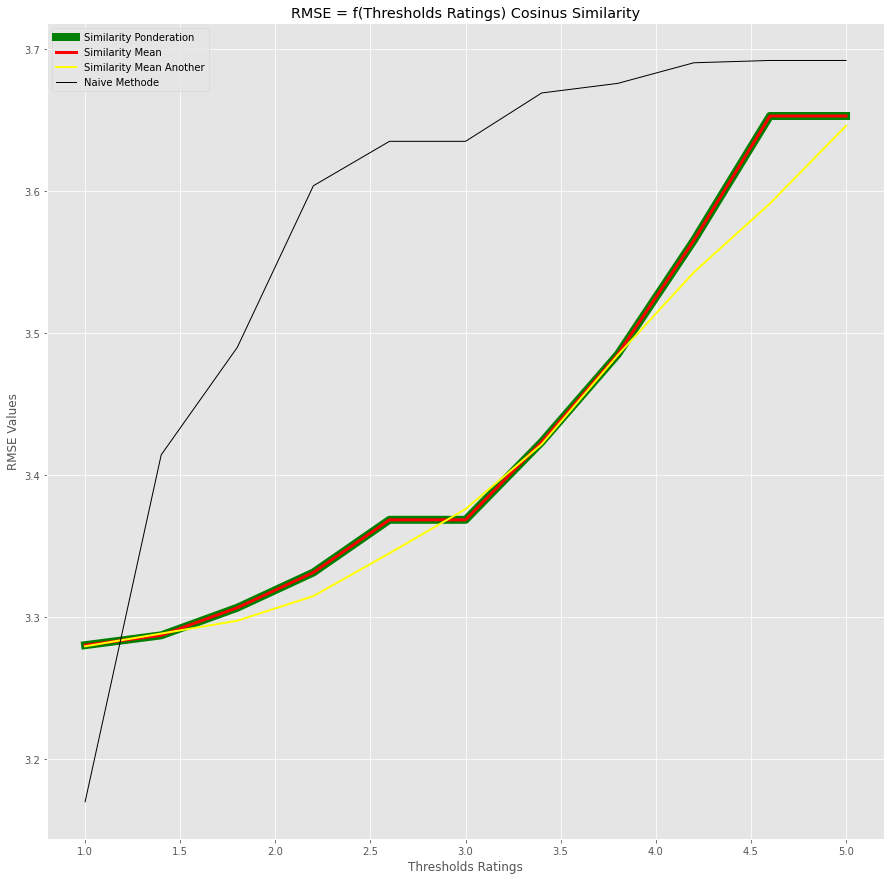

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
plt.xlabel('Thresholds Ratings')
plt.ylabel('RMSE Values')
plt.title('RMSE = f(Thresholds Ratings) Cosinus Similarity')
plt.plot(thresholdsRating, rsmeValuesCosinus['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(thresholdsRating, rsmeValuesCosinus['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean")
plt.plot(thresholdsRating, rsmeValuesCosinus['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(thresholdsRating, rsmeNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('rsmeValuesCosinusthresholdsRating.png')
plt.legend(loc='best')
plt.show()

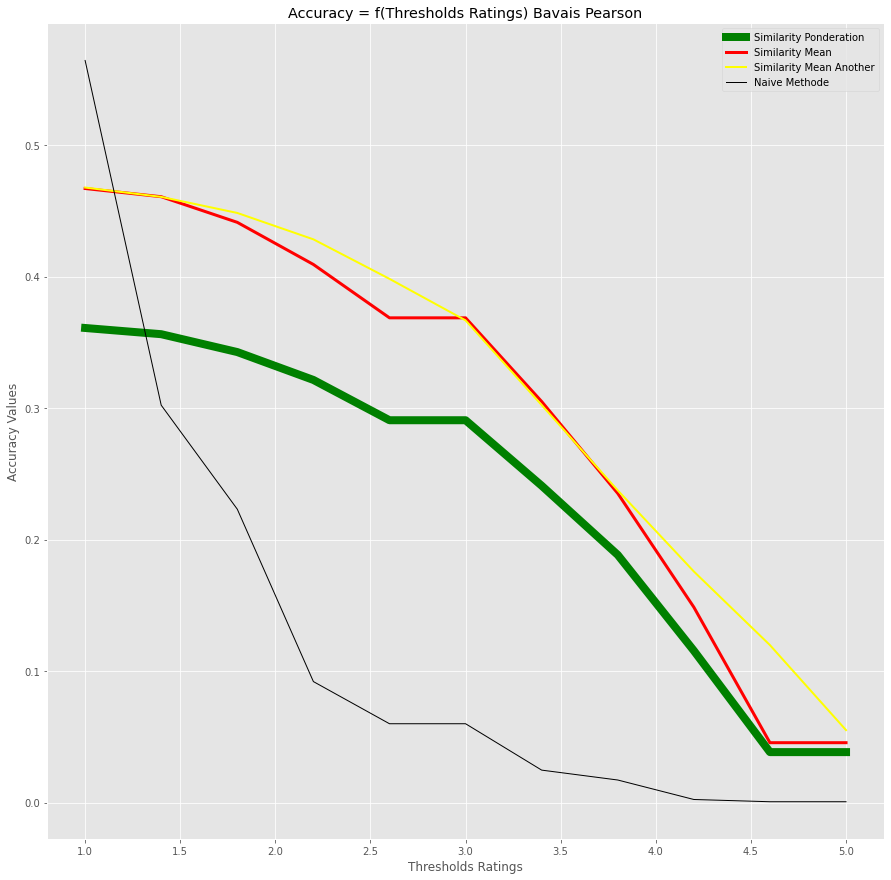

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
plt.xlabel('Thresholds Ratings')
plt.ylabel('Accuracy Values')
plt.title('Accuracy = f(Thresholds Ratings) Bavais Pearson')
plt.plot(thresholdsRating, accuracyValuesBavaisPearson['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(thresholdsRating, accuracyValuesBavaisPearson['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean")
plt.plot(thresholdsRating, accuracyValuesBavaisPearson['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(thresholdsRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('accuracyValuesBavaisPearsonthresholdsRating.png')
plt.legend(loc='best')
plt.show()

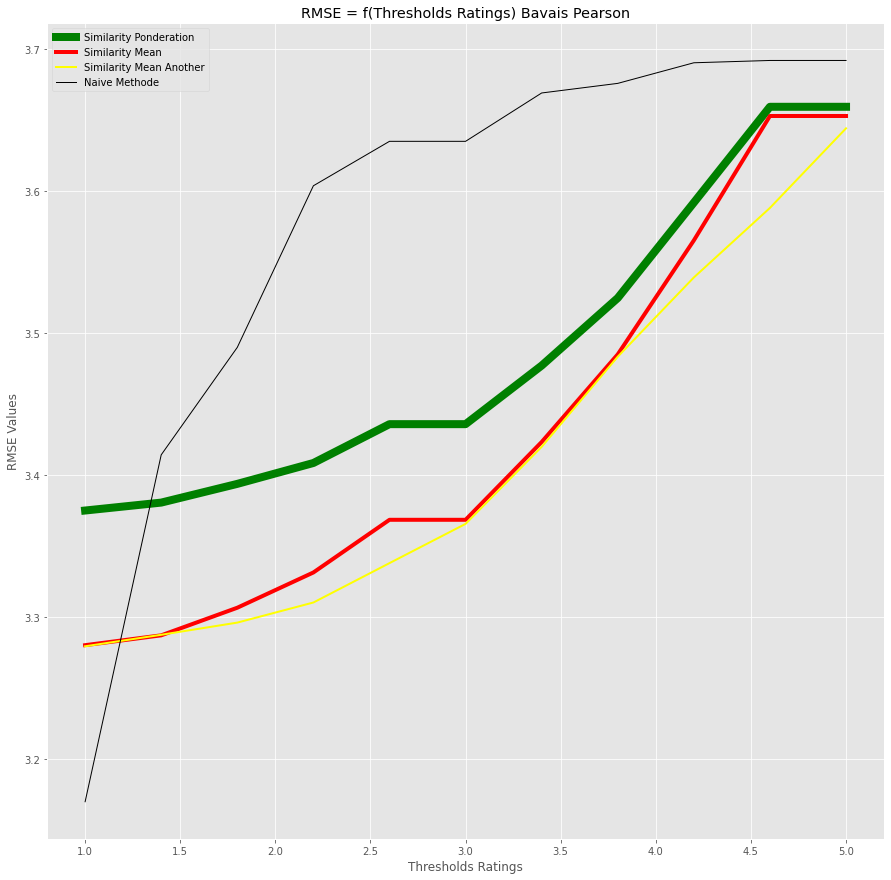

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
plt.xlabel('Thresholds Ratings')
plt.ylabel('RMSE Values')
plt.title('RMSE = f(Thresholds Ratings) Bavais Pearson')
plt.plot(thresholdsRating, rsmeValuesBavaisPearson['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(thresholdsRating, rsmeValuesBavaisPearson['SimilarityMean'], color='red', linewidth=4, label="Similarity Mean")
plt.plot(thresholdsRating, rsmeValuesBavaisPearson['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(thresholdsRating, rsmeNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('rsmeValuesBavaisPearsonthresholdsRating.png')
plt.legend(loc='best')
plt.show()

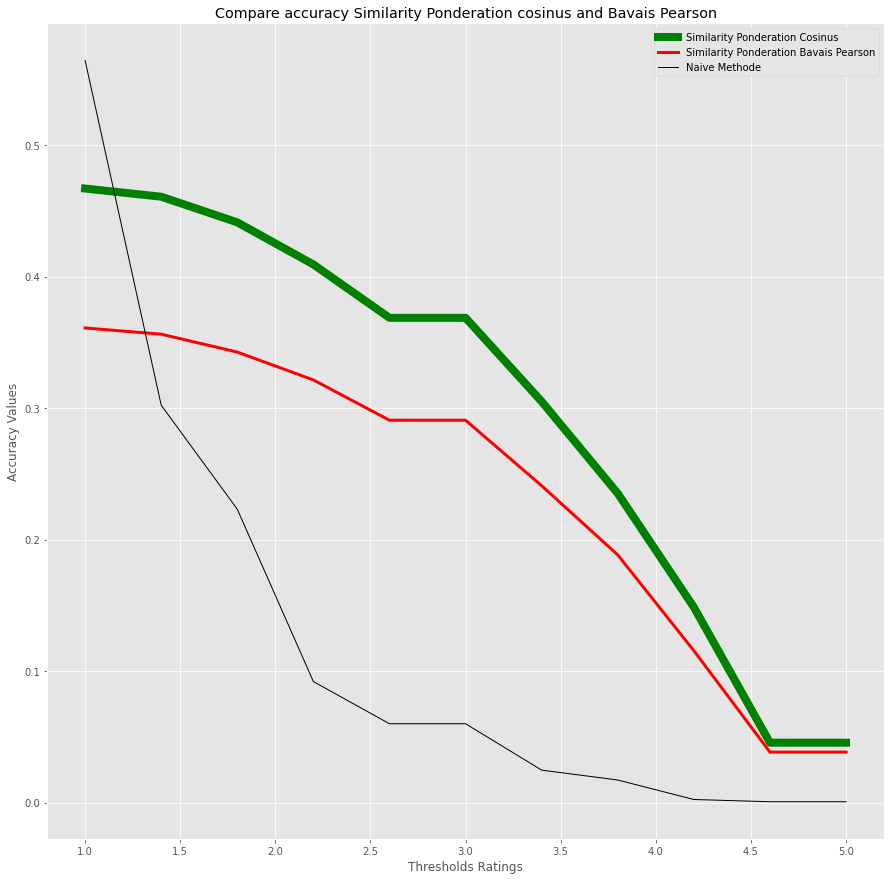

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
plt.xlabel('Thresholds Ratings')
plt.ylabel('Accuracy Values')
plt.title('Compare accuracy Similarity Ponderation cosinus and Bavais Pearson')
plt.plot(thresholdsRating, accuracyValuesCosinus['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation Cosinus")
plt.plot(thresholdsRating, accuracyValuesBavaisPearson['SimilarityPonderation'], color='red', linewidth=3, label="Similarity Ponderation Bavais Pearson")
plt.plot(thresholdsRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('compareAccuracySimilarityPonderationthresholdsRating.png')
plt.legend(loc='best')
plt.show()

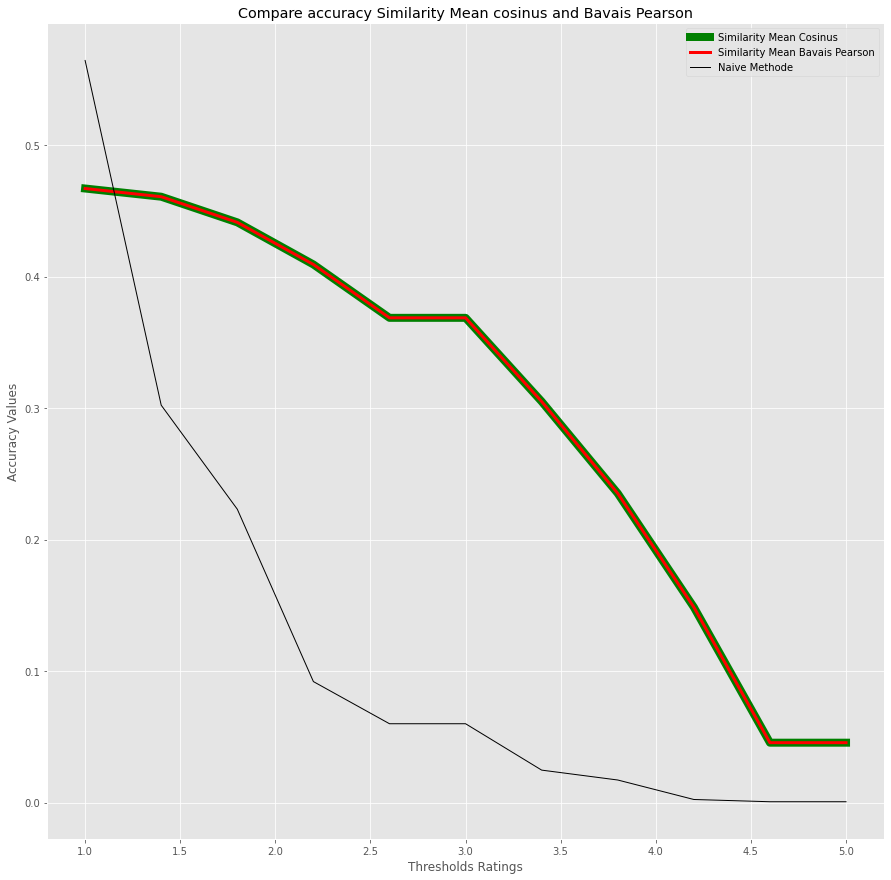

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
plt.xlabel('Thresholds Ratings')
plt.ylabel('Accuracy Values')
plt.title('Compare accuracy Similarity Mean cosinus and Bavais Pearson')
plt.plot(thresholdsRating, accuracyValuesCosinus['SimilarityMean'], color='green', linewidth=8, label="Similarity Mean Cosinus")
plt.plot(thresholdsRating, accuracyValuesBavaisPearson['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean Bavais Pearson")
plt.plot(thresholdsRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")

#plt.savefig('compareAccuracySimilarityMeanThresholds.png')
plt.legend(loc='best')
plt.show()

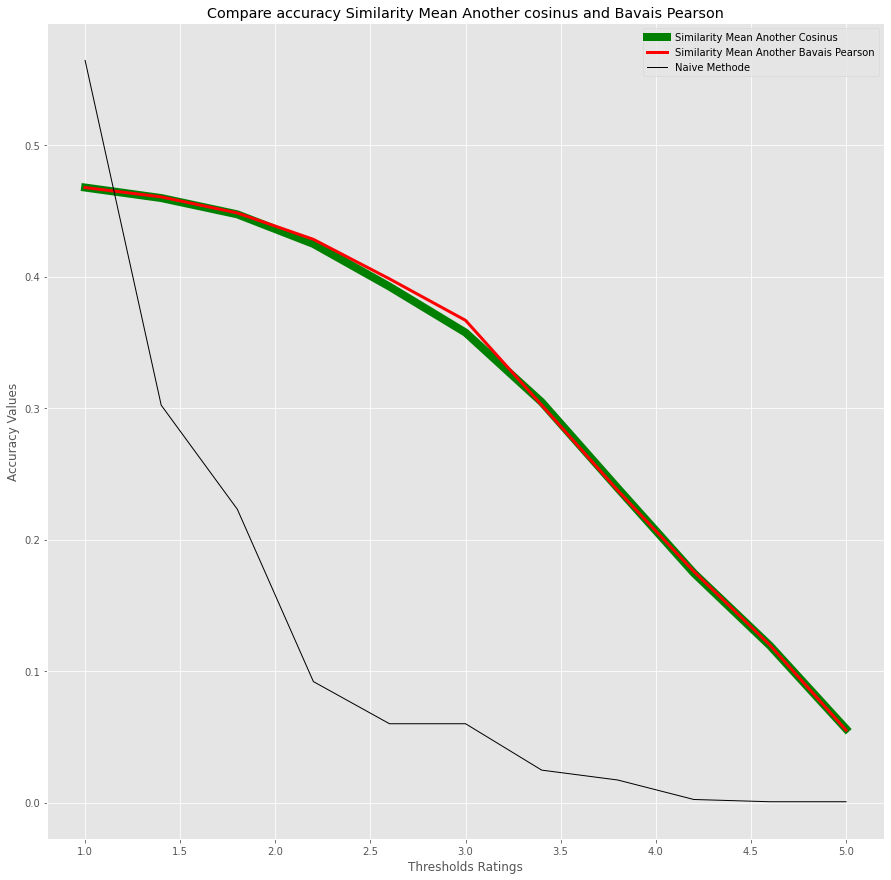

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
plt.xlabel('Thresholds Ratings')
plt.ylabel('Accuracy Values')
plt.title('Compare accuracy Similarity Mean Another cosinus and Bavais Pearson')
plt.plot(thresholdsRating, accuracyValuesCosinus['SimilarityMeanAnother'], color='green', linewidth=8, label="Similarity Mean Another Cosinus")
plt.plot(thresholdsRating, accuracyValuesBavaisPearson['SimilarityMeanAnother'], color='red', linewidth=3, label="Similarity Mean Another Bavais Pearson")
plt.plot(thresholdsRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('compareAccuracySimilarityMeanAnotherThresholdsRating.png')
plt.legend(loc='best')
plt.show()

#### Number Of Movie Rating By Users

In [ ]:
#[j*5 for j in range(1,25)]
#list(set(Data_Training['userId'].values))
#min(len(Data_Training[Data_Training['userId']==1]), 10)

In [ ]:
numberOfMovieRating = [j*5 for j in range(1,25)]
recommandationMeanThresholds = 10
thresholdsRatingT = 4

In [ ]:
# cosinus result
rsmeValuesCosinus = dict()
rsmeValuesCosinus['SimilarityPonderation'] = list()
rsmeValuesCosinus['SimilarityMean'] = list()
rsmeValuesCosinus['SimilarityMeanAnother'] = list()

accuracyValuesCosinus = dict()
accuracyValuesCosinus['SimilarityPonderation'] = list()
accuracyValuesCosinus['SimilarityMean'] = list()
accuracyValuesCosinus['SimilarityMeanAnother'] = list()

precisionValuesCosinus = dict()
precisionValuesCosinus['SimilarityPonderation'] = list()
precisionValuesCosinus['SimilarityMean'] = list()
precisionValuesCosinus['SimilarityMeanAnother'] = list()

recallValuesCosinus = dict()
recallValuesCosinus['SimilarityPonderation'] = list()
recallValuesCosinus['SimilarityMean'] = list()
recallValuesCosinus['SimilarityMeanAnother'] = list()

f1ScoreValuesCosinus = dict()
f1ScoreValuesCosinus['SimilarityPonderation'] = list()
f1ScoreValuesCosinus['SimilarityMean'] = list()
f1ScoreValuesCosinus['SimilarityMeanAnother'] = list()

# Bravais Pearson Result

rsmeValuesBavaisPearson = dict()
rsmeValuesBavaisPearson['SimilarityPonderation'] = list()
rsmeValuesBavaisPearson['SimilarityMean'] = list()
rsmeValuesBavaisPearson['SimilarityMeanAnother'] = list()

accuracyValuesBavaisPearson = dict()
accuracyValuesBavaisPearson['SimilarityPonderation'] = list()
accuracyValuesBavaisPearson['SimilarityMean'] = list()
accuracyValuesBavaisPearson['SimilarityMeanAnother'] = list()

precisionValuesBavaisPearson = dict()
precisionValuesBavaisPearson['SimilarityPonderation'] = list()
precisionValuesBavaisPearson['SimilarityMean'] = list()
precisionValuesBavaisPearson['SimilarityMeanAnother'] = list()

recallValuesBavaisPearson = dict()
recallValuesBavaisPearson['SimilarityPonderation'] = list()
recallValuesBavaisPearson['SimilarityMean'] = list()
recallValuesBavaisPearson['SimilarityMeanAnother'] = list()

f1ScoreValuesBavaisPearson = dict()
f1ScoreValuesBavaisPearson['SimilarityPonderation'] = list()
f1ScoreValuesBavaisPearson['SimilarityMean'] = list()
f1ScoreValuesBavaisPearson['SimilarityMeanAnother'] = list()

# Naive Methode

rsmeNaive = list()
accuracyValuesNaive = list()
precisionValuesNaive = list()
recallValuesNaive = list()
f1ScoreValuesNaive = list()

In [ ]:
for i in numberOfMovieRating:
   
    rmseTamponSPList = list()
    rmseTamponMList = list()
    rmseTamponMAList = list()

    accuracySPList = list()
    accuracyMList = list()
    accuracyMAList = list()

    precisionSPList = list()
    precisionMList = list()
    precisionMAList = list()

    recallSPList = list()
    recallMList = list()
    recallMAList = list()

    f1ScoreSPList = list()
    f1ScoreMList = list()
    f1ScoreMAList = list()

    # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
    rmseTamponBpSPList = list()
    rmseTamponBpMList = list()
    rmseTamponBpMAList = list()

    accuracyBpSPList = list()
    accuracyBpMList = list()
    accuracyBpMAList = list()

    precisionBpSPList = list()
    precisionBpMList = list()
    precisionBpMAList = list()

    recallBpSPList = list()
    recallBpMList = list()
    recallBpMAList = list()

    f1ScoreBpSPList = list()
    f1ScoreBpMList = list()
    f1ScoreBpMAList = list()


    # Naive Methode Result-------------------------------------------------------------------------------------------------------------------------------
    rmseTamponBpNaiveList = list()
    accuracyBpNaiveList = list()
    precisionBpNaiveList = list()
    recallBpNaiveList = list()
    f1ScoreBpNaiveList = list()

    #New_Traning_Data = extract_user_id(Data_Training, [k for k in range(1,1+i)])
   
    for j in range(len(Data_Testing)):
        
        # Cosinus Result-------------------------------------------------------------------------------------------------------------------------------
        
        recommandationSimilarityPonderation, recommandationSimilarityMean, recommandationSimilarityMeanAnother = recommandation_user_cosinus(Data_Testing[j][0].head(min(len(Data_Testing[j][0]), i)), list(Data_Testing[j][1].keys()), Data_Training, recommandationMeanThresholds)
        predictionDictionnaireSP, accuracySP, precisionSP, recallSP, f1ScoreSP = prediction(Data_Testing[j][2], recommandationSimilarityPonderation, thresholdsRatingT)
        rmseTamponSP = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireSP.values())))
        accuracySPList.append(accuracySP)
        precisionSPList.append(precisionSP)
        recallSPList.append(recallSP)
        f1ScoreSPList.append(f1ScoreSP)
        rmseTamponSPList.append(rmseTamponSP)
        
        predictionDictionnaireM, accuracyM, precisionM, recallM, f1ScoreM = prediction(Data_Testing[j][2], recommandationSimilarityMean, thresholdsRatingT)
        rmseTamponM = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireM.values())))
        rmseTamponMList.append(rmseTamponM)
        accuracyMList.append(accuracyM)
        precisionMList.append(precisionM)
        recallMList.append(recallM)
        f1ScoreMList.append(f1ScoreM)

        predictionDictionnaireMA, accuracyMA, precisionMA, recallMA, f1ScoreMA = prediction(Data_Testing[j][2], recommandationSimilarityMeanAnother, thresholdsRatingT)
        rmseTamponMA = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireMA.values())))
        rmseTamponMAList.append(rmseTamponMA)
        accuracyMAList.append(accuracyMA)
        precisionMAList.append(precisionMA)
        recallMAList.append(recallMA)
        f1ScoreMAList.append(f1ScoreMA)

        # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
        recommandationSimilarityPonderationBP, recommandationSimilarityMeanBP, recommandationSimilarityMeanAnotherBP = recommandation_user_bravais_pearson(Data_Testing[j][0].head(min(len(Data_Testing[j][0]), i)), list(Data_Testing[j][1].keys()), Data_Training, recommandationMeanThresholds)

        predictionDictionnaireBpSP, accuracyBpSP, precisionBpSP, recallBpSP, f1ScoreBpSP = prediction(Data_Testing[j][2], recommandationSimilarityPonderationBP, thresholdsRatingT)
        rmseTamponBpSP = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpSP.values())))
        rmseTamponBpSPList.append(rmseTamponBpSP)
        accuracyBpSPList.append(accuracyBpSP)
        precisionBpSPList.append(precisionBpSP)
        recallBpSPList.append(recallBpSP)
        f1ScoreBpSPList.append(f1ScoreBpSP)

        predictionDictionnaireBpM, accuracyBpM, precisionBpM, recallBpM, f1ScoreBpM = prediction(Data_Testing[j][2], recommandationSimilarityMeanBP, thresholdsRatingT)
        rmseTamponBpM = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpM.values())))
        rmseTamponBpMList.append(rmseTamponBpM)
        accuracyBpMList.append(accuracyBpM)
        precisionBpMList.append(precisionBpM)
        recallBpMList.append(recallBpM)
        f1ScoreBpMList.append(f1ScoreBpM)

        predictionDictionnaireBpMA, accuracyBpMA, precisionBpMA, recallBpMA, f1ScoreBpMA = prediction(Data_Testing[j][2], recommandationSimilarityMeanAnotherBP, thresholdsRatingT)
        rmseTamponBpMA = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpMA.values())))
        accuracyBpMAList.append(accuracyBpMA)
        precisionBpMAList.append(precisionBpMA)
        recallBpMAList.append(recallBpMA)
        f1ScoreBpMAList.append(f1ScoreBpMA)
        rmseTamponBpMAList.append(rmseTamponBpMA)
        # Naive Methode Result-------------------------------------------------------------------------------------------------------------------------------
        naiveMethode = recommandation_naive_mean(list(Data_Testing[j][1].keys()), newDataFram)
        predictionDictionnaireBpNaive, accuracyBpNaive, precisionBpNaive, recallBpNaive, f1ScoreBpNaive = prediction(Data_Testing[j][2], naiveMethode, thresholdsRatingT)
        rmseTamponBpNaive = RMSE(np.array(list(Data_Testing[j][1].values())), np.array(list(predictionDictionnaireBpNaive.values())))
        precisionBpNaiveList.append(precisionBpNaive)
        recallBpNaiveList.append(recallBpNaive)
        f1ScoreBpNaiveList.append(f1ScoreBpNaive)
        accuracyBpNaiveList.append(accuracyBpNaive)
        rmseTamponBpNaiveList.append(rmseTamponBpNaive)

    # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
    
    rsmeValuesCosinus['SimilarityPonderation'].append(np.mean(rmseTamponSPList))
    rsmeValuesCosinus['SimilarityMean'].append(np.mean(rmseTamponMList))
    rsmeValuesCosinus['SimilarityMeanAnother'].append(np.mean(rmseTamponMAList))

    accuracyValuesCosinus['SimilarityPonderation'].append(np.mean(accuracySPList))
    accuracyValuesCosinus['SimilarityMean'].append(np.mean(accuracyMList))
    accuracyValuesCosinus['SimilarityMeanAnother'].append(np.mean(accuracyMAList))

    precisionValuesCosinus['SimilarityPonderation'].append(np.mean(precisionSPList))
    precisionValuesCosinus['SimilarityMean'].append(np.mean(precisionMList))
    precisionValuesCosinus['SimilarityMeanAnother'].append(np.mean(precisionMAList))

    recallValuesCosinus['SimilarityPonderation'].append(np.mean(recallSPList))
    recallValuesCosinus['SimilarityMean'].append(np.mean(recallMList))
    recallValuesCosinus['SimilarityMeanAnother'].append(np.mean(recallMAList))

    f1ScoreValuesCosinus['SimilarityPonderation'].append(np.mean(f1ScoreSPList))
    f1ScoreValuesCosinus['SimilarityMean'].append(np.mean(f1ScoreMList))
    f1ScoreValuesCosinus['SimilarityMeanAnother'].append(np.mean(f1ScoreMAList))

    # Bravais Pearson Result-------------------------------------------------------------------------------------------------------------------------------
    rsmeValuesBavaisPearson['SimilarityPonderation'].append(np.mean(rmseTamponBpSPList))
    rsmeValuesBavaisPearson['SimilarityMean'].append(np.mean(rmseTamponBpMList))
    rsmeValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(rmseTamponBpMAList))

    accuracyValuesBavaisPearson['SimilarityPonderation'].append(np.mean(accuracyBpSPList))
    accuracyValuesBavaisPearson['SimilarityMean'].append(np.mean(accuracyBpMList))
    accuracyValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(accuracyBpMAList))

    precisionValuesBavaisPearson['SimilarityPonderation'].append(np.mean(precisionBpSPList))
    precisionValuesBavaisPearson['SimilarityMean'].append(np.mean(precisionBpMList))
    precisionValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(precisionBpMAList))

    recallValuesBavaisPearson['SimilarityPonderation'].append(np.mean(recallBpSPList))
    recallValuesBavaisPearson['SimilarityMean'].append(np.mean(recallBpMList))
    recallValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(recallBpMAList))

    f1ScoreValuesBavaisPearson['SimilarityPonderation'].append(np.mean(f1ScoreBpSPList))
    f1ScoreValuesBavaisPearson['SimilarityMean'].append(np.mean(f1ScoreBpMList))
    f1ScoreValuesBavaisPearson['SimilarityMeanAnother'].append(np.mean(f1ScoreBpMAList))

    #Naive Methode Result-------------------------------------------------------------------------------------------------------------------------------
    rsmeNaive.append(np.mean(rmseTamponBpNaiveList))
    accuracyValuesNaive.append(np.mean(accuracyBpNaiveList))
    precisionValuesNaive.append(np.mean(precisionBpNaiveList))
    recallValuesNaive.append(np.mean(recallBpNaiveList))
    f1ScoreValuesNaive.append(np.mean(f1ScoreBpNaiveList))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


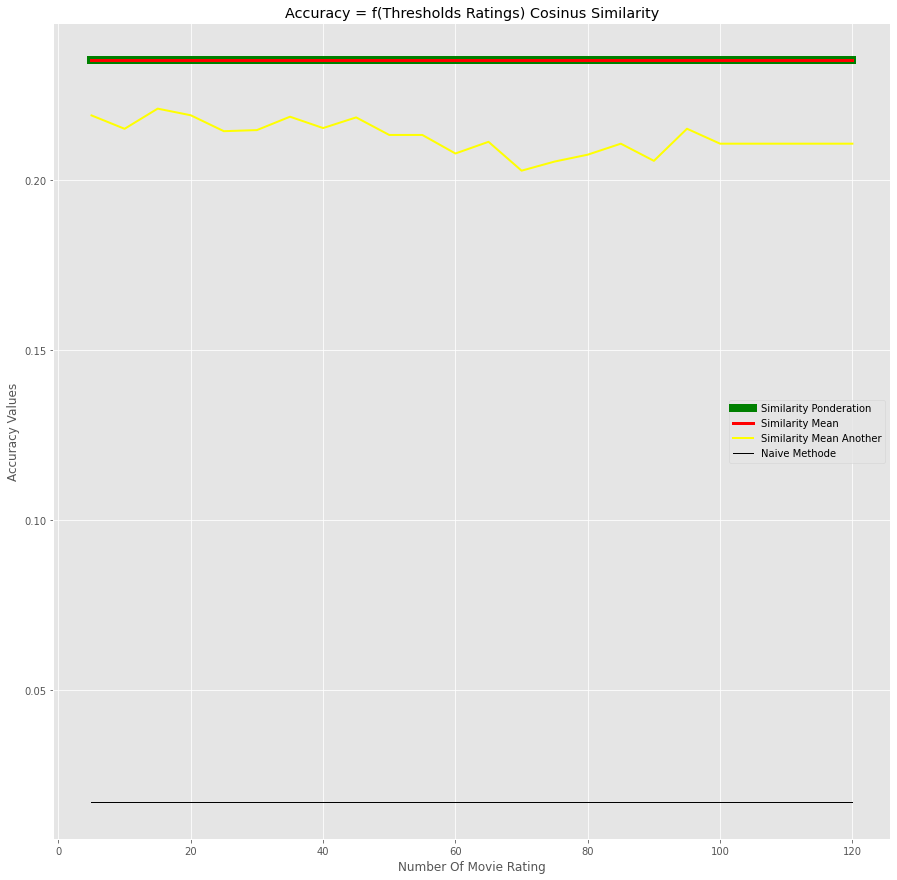

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Number Of Movie Rating')
plt.ylabel('Accuracy Values')
plt.title('Accuracy = f(Thresholds Ratings) Cosinus Similarity')
plt.plot(numberOfMovieRating, accuracyValuesCosinus['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(numberOfMovieRating, accuracyValuesCosinus['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean")
plt.plot(numberOfMovieRating, accuracyValuesCosinus['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(numberOfMovieRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('accuracyValuesCosinusnumberOfMovieRating.png')
plt.legend(loc='best')
plt.show()

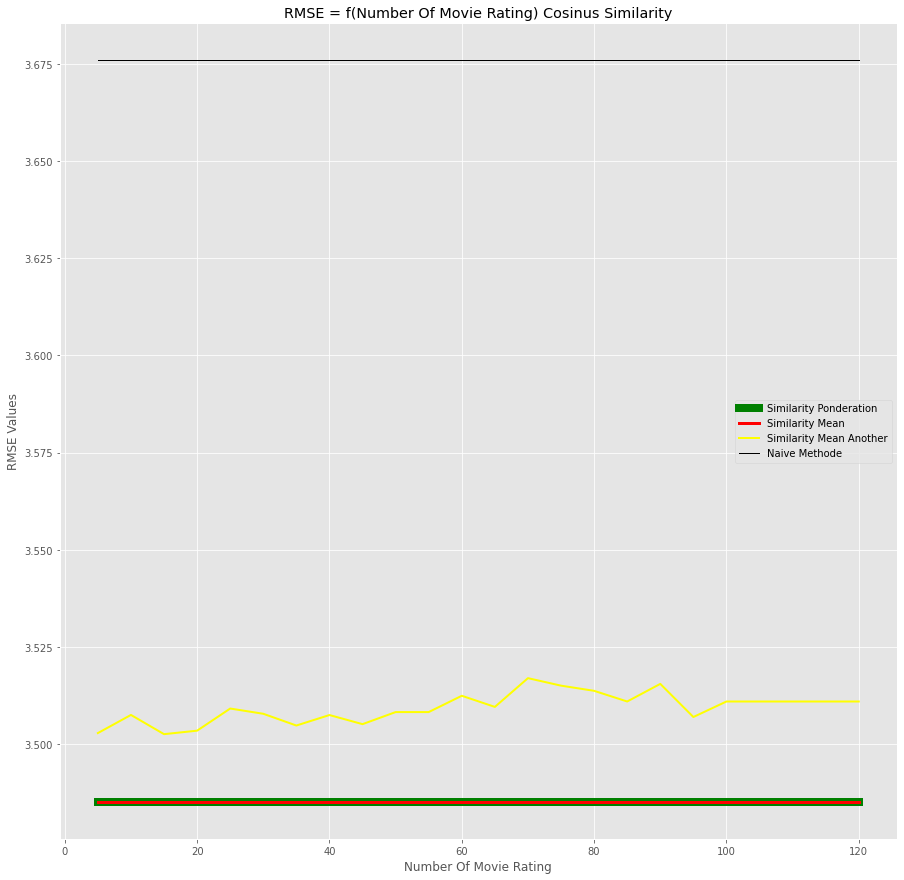

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Number Of Movie Rating')
plt.ylabel('RMSE Values')
plt.title('RMSE = f(Number Of Movie Rating) Cosinus Similarity')
plt.plot(numberOfMovieRating, rsmeValuesCosinus['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(numberOfMovieRating, rsmeValuesCosinus['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean")
plt.plot(numberOfMovieRating, rsmeValuesCosinus['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(numberOfMovieRating, rsmeNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('rsmeValuesCosinusnumberOfMovieRating.png')
plt.legend(loc='best')
plt.show()

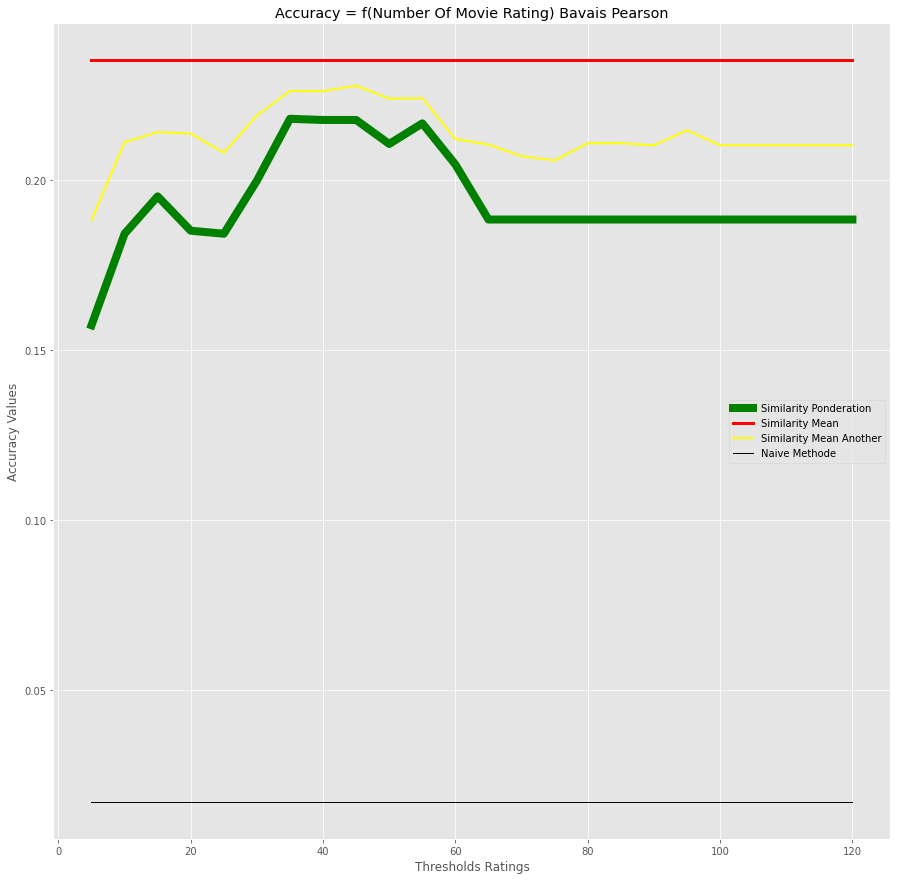

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Thresholds Ratings')
plt.ylabel('Accuracy Values')
plt.title('Accuracy = f(Number Of Movie Rating) Bavais Pearson')
plt.plot(numberOfMovieRating, accuracyValuesBavaisPearson['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(numberOfMovieRating, accuracyValuesBavaisPearson['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean")
plt.plot(numberOfMovieRating, accuracyValuesBavaisPearson['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(numberOfMovieRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('accuracyValuesBavaisPearsonnumberOfMovieRating.png')
plt.legend(loc='best')
plt.show()

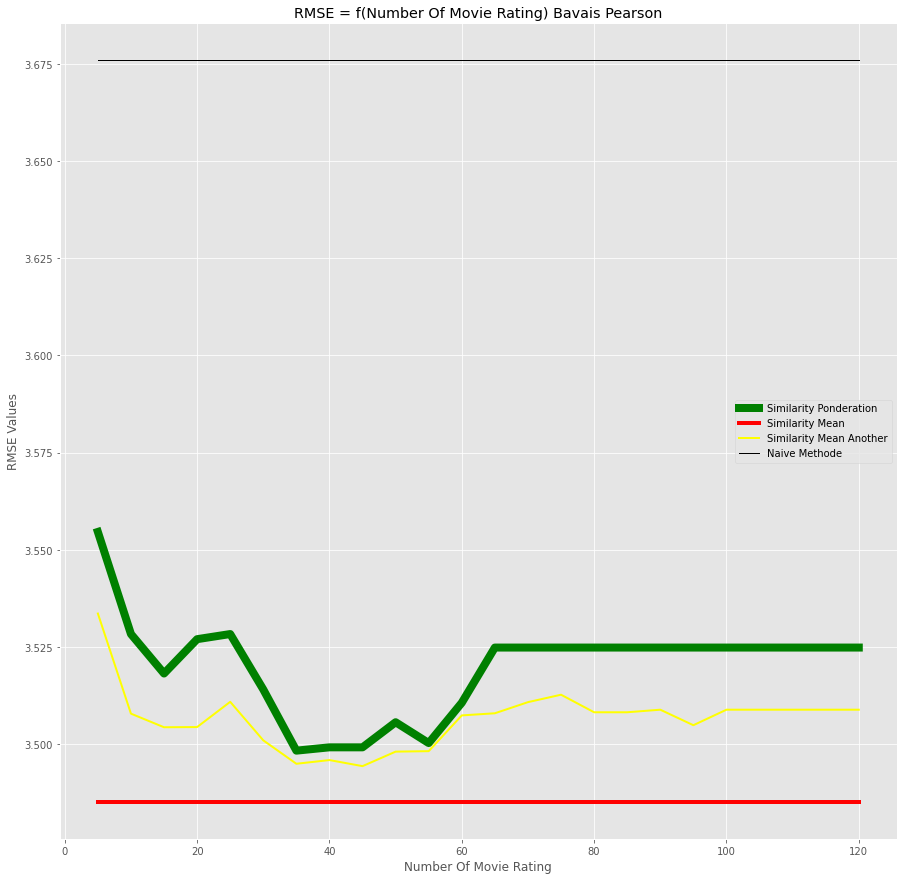

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Number Of Movie Rating')
plt.ylabel('RMSE Values')
plt.title('RMSE = f(Number Of Movie Rating) Bavais Pearson')
plt.plot(numberOfMovieRating, rsmeValuesBavaisPearson['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation")
plt.plot(numberOfMovieRating, rsmeValuesBavaisPearson['SimilarityMean'], color='red', linewidth=4, label="Similarity Mean")
plt.plot(numberOfMovieRating, rsmeValuesBavaisPearson['SimilarityMeanAnother'], color='yellow', linewidth=2, label="Similarity Mean Another")
plt.plot(numberOfMovieRating, rsmeNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('rsmeValuesBavaisPearsonnumberOfMovieRating.png')
plt.legend(loc='best')
plt.show()

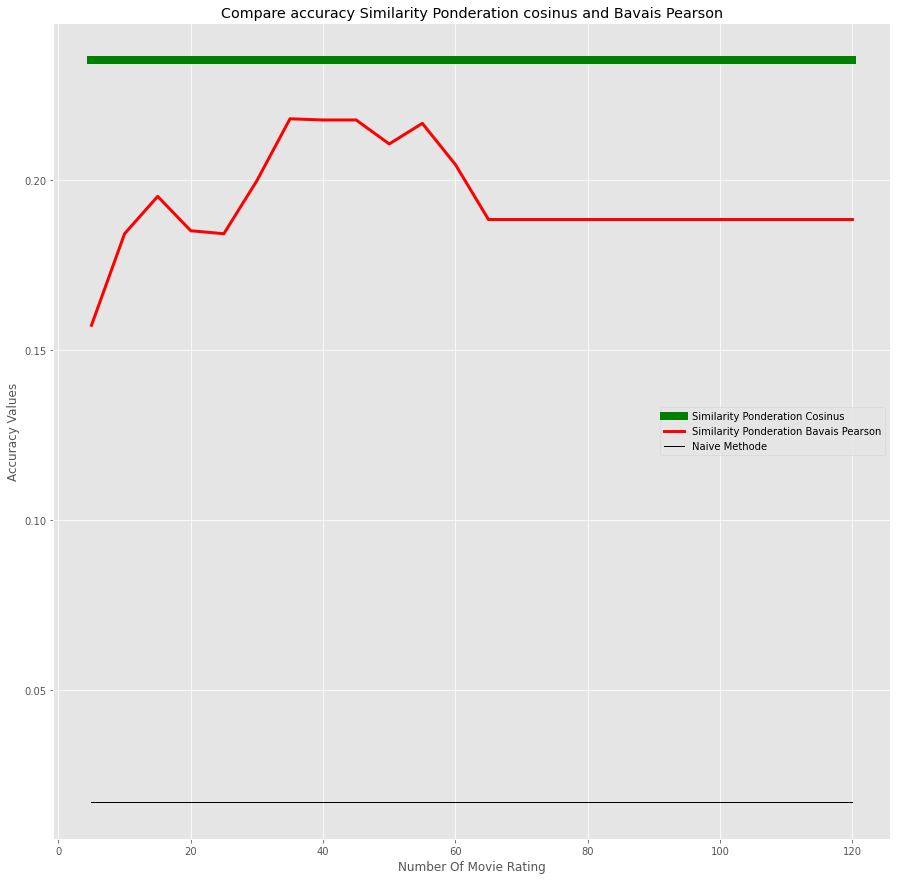

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Number Of Movie Rating')
plt.ylabel('Accuracy Values')
plt.title('Compare accuracy Similarity Ponderation cosinus and Bavais Pearson')
plt.plot(numberOfMovieRating, accuracyValuesCosinus['SimilarityPonderation'], color='green', linewidth=8, label="Similarity Ponderation Cosinus")
plt.plot(numberOfMovieRating, accuracyValuesBavaisPearson['SimilarityPonderation'], color='red', linewidth=3, label="Similarity Ponderation Bavais Pearson")
plt.plot(numberOfMovieRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('compareAccuracySimilarityPonderationNumberOfMovieRating.png')
plt.legend(loc='best')
plt.show()

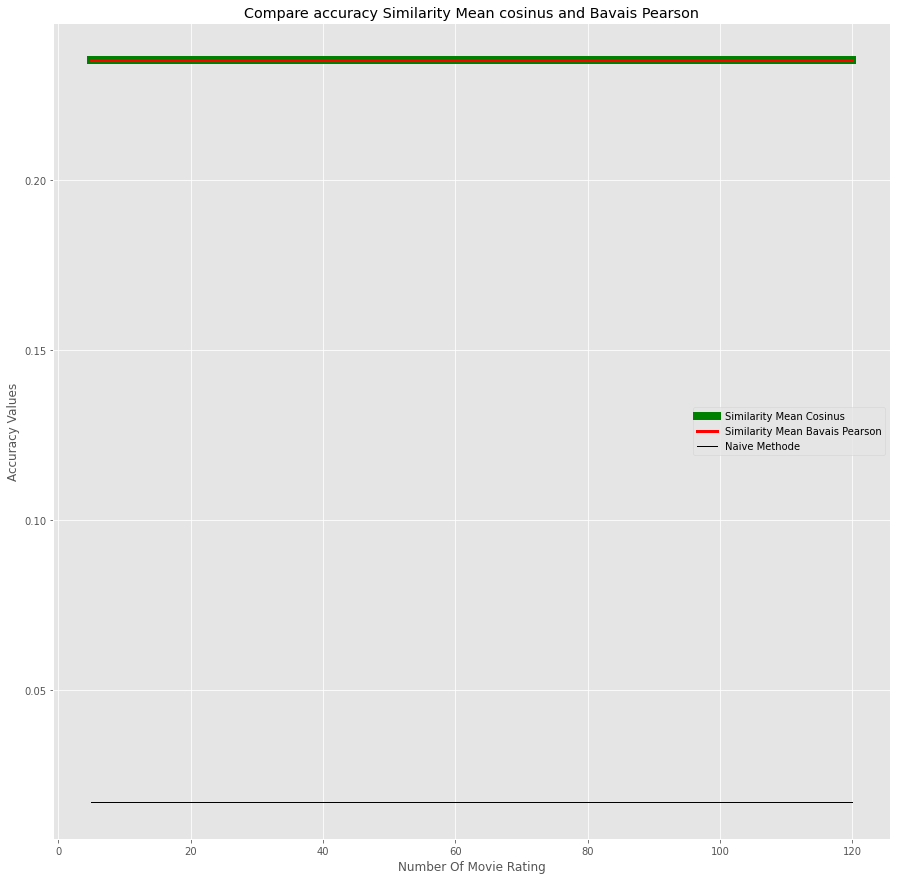

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Number Of Movie Rating')
plt.ylabel('Accuracy Values')
plt.title('Compare accuracy Similarity Mean cosinus and Bavais Pearson')
plt.plot(numberOfMovieRating, accuracyValuesCosinus['SimilarityMean'], color='green', linewidth=8, label="Similarity Mean Cosinus")
plt.plot(numberOfMovieRating, accuracyValuesBavaisPearson['SimilarityMean'], color='red', linewidth=3, label="Similarity Mean Bavais Pearson")
plt.plot(numberOfMovieRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('compareAccuracySimilarityMeanNumberOfMovieRating.png')
plt.legend(loc='best')
plt.show()

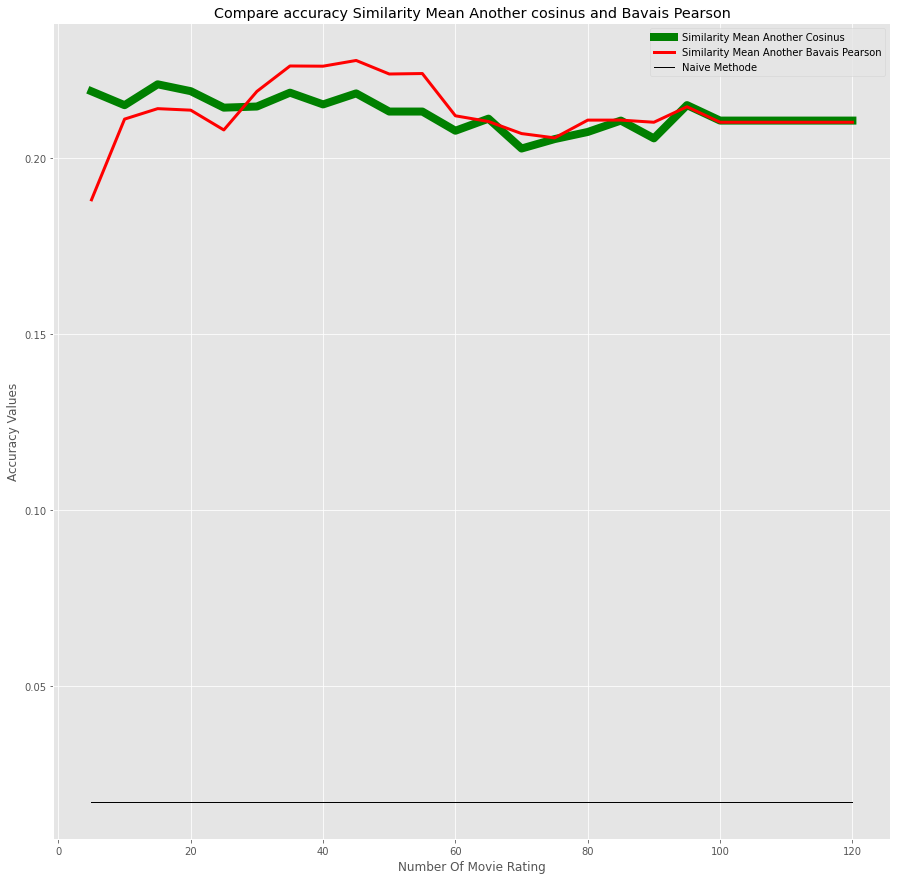

In [ ]:
plt.figure(figsize=(15,15))
plt.style.use('ggplot')
# Area plot
plt.xlabel('Number Of Movie Rating')
plt.ylabel('Accuracy Values')
plt.title('Compare accuracy Similarity Mean Another cosinus and Bavais Pearson')
plt.plot(numberOfMovieRating, accuracyValuesCosinus['SimilarityMeanAnother'], color='green', linewidth=8, label="Similarity Mean Another Cosinus")
plt.plot(numberOfMovieRating, accuracyValuesBavaisPearson['SimilarityMeanAnother'], color='red', linewidth=3, label="Similarity Mean Another Bavais Pearson")
plt.plot(numberOfMovieRating, accuracyValuesNaive, color='black', linewidth=1, label="Naive Methode")
#plt.savefig('compareAccuracySimilarityMeanAnotherNumberOfMovieRating.png')
plt.legend(loc='best')
plt.show()